In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc, precision_recall_curve, confusion_matrix, roc_auc_score, RocCurveDisplay, PrecisionRecallDisplay
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import shap

In [2]:
df = pd.read_csv(r"C:\Users\Robyi\Documents\Data Science Dataset\wine.csv")
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [4]:
x = df.drop(columns=['Customer_Segment'])
y = df['Customer_Segment']

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.35, random_state=42)

In [7]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ada',AdaBoostClassifier(estimator=DecisionTreeClassifier(),random_state=42))
])

In [8]:
param_grid = {
    'ada__n_estimators': [50, 100, 200, 500],
    'ada__learning_rate': [0.001, 0.01, 0.1, 1, 10],
    'ada__algorithm' : ['SAMME', 'SAMME.R'],
}

grid_search = GridSearchCV(pipeline,
param_grid=param_grid,
scoring='accuracy',
cv=5,
n_jobs=-1, verbose=1
)

grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('ada',
                                        AdaBoostClassifier(estimator=DecisionTreeClassifier(),
                                                           random_state=42))]),
             n_jobs=-1,
             param_grid={'ada__algorithm': ['SAMME', 'SAMME.R'],
                         'ada__learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'ada__n_estimators': [50, 100, 200, 500]},
             scoring='accuracy', verbose=1)

In [9]:
best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test)
print(y_pred)

[1 1 3 1 2 1 2 3 2 3 2 2 1 2 1 2 2 2 1 2 1 2 2 3 3 3 2 2 2 1 1 2 3 1 1 1 3
 3 2 3 2 2 2 2 3 1 2 2 3 1 2 1 1 3 3 2 2 1 2 2 3 2 2]


In [ ]:
proba = best_model.predict_proba(x_test)
print(proba)

[[0.51420938 0.24289531 0.24289531]
 [0.51420938 0.24289531 0.24289531]
 [0.24289531 0.24289531 0.51420938]
 [0.51420938 0.24289531 0.24289531]
 [0.24289531 0.51420938 0.24289531]
 [0.51420938 0.24289531 0.24289531]
 [0.24289531 0.51420938 0.24289531]
 [0.24289531 0.24289531 0.51420938]
 [0.24289531 0.51420938 0.24289531]
 [0.24289531 0.24289531 0.51420938]
 [0.24289531 0.51420938 0.24289531]
 [0.24289531 0.51420938 0.24289531]
 [0.51420938 0.24289531 0.24289531]
 [0.24289531 0.51420938 0.24289531]
 [0.51420938 0.24289531 0.24289531]
 [0.24289531 0.51420938 0.24289531]
 [0.24289531 0.51420938 0.24289531]
 [0.24289531 0.51420938 0.24289531]
 [0.51420938 0.24289531 0.24289531]
 [0.24289531 0.51420938 0.24289531]
 [0.51420938 0.24289531 0.24289531]
 [0.24289531 0.51420938 0.24289531]
 [0.24289531 0.51420938 0.24289531]
 [0.24289531 0.24289531 0.51420938]
 [0.24289531 0.24289531 0.51420938]
 [0.24289531 0.24289531 0.51420938]
 [0.24289531 0.51420938 0.24289531]
 [0.24289531 0.51420938 0.24

In [13]:
prediksi = pd.read_csv(r"C:\Users\Robyi\Documents\Data Science Dataset\winepredict.csv")
prediksi.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
2,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
3,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
4,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045


In [ ]:
y_prediksi = best_model.predict(prediksi)
probabilitas_prediksi = best_model.predict_proba(prediksi)
print(y_prediksi)
print(probabilitas_prediksi)

[1 1 1 1 1 1 1]
[1 1 1 1 1 1 1]


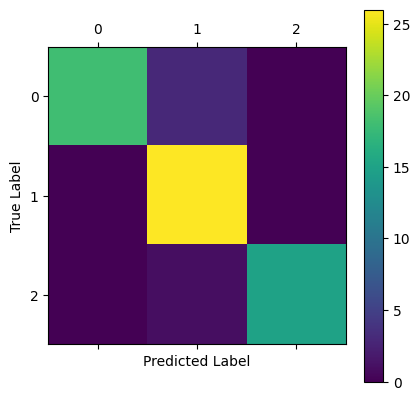

In [15]:
matrix = confusion_matrix(y_test, y_pred)

plt.matshow(matrix)
plt.colorbar()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [16]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9365079365079365

Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.86      0.92        21
           2       0.87      1.00      0.93        26
           3       1.00      0.94      0.97        16

    accuracy                           0.94        63
   macro avg       0.96      0.93      0.94        63
weighted avg       0.94      0.94      0.94        63



Text(113.9222222222222, 0.5, 'true value')

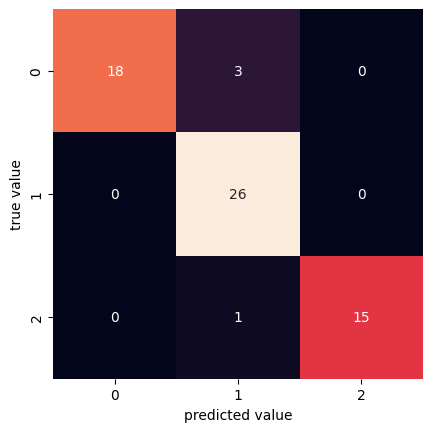

In [17]:
sns.heatmap(matrix, square  =True, annot = True, cbar = False)
plt.xlabel('predicted value')
plt.ylabel('true value')

In [57]:
cv_scores = cross_val_score(best_model, x_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

Cross-Validation Scores: [0.95652174 0.91304348 0.91304348 0.95652174 0.91304348]
Mean CV Accuracy: 0.9304347826086955


In [58]:
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Test Accuracy: 0.9365079365079365


0.9392523901452473


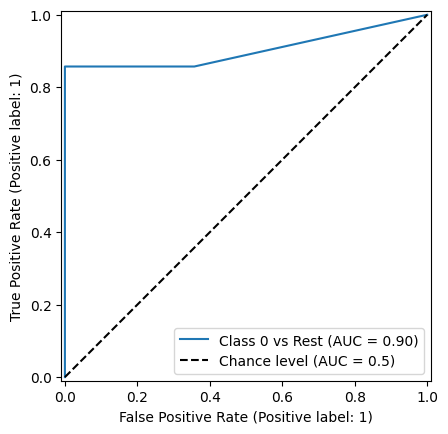

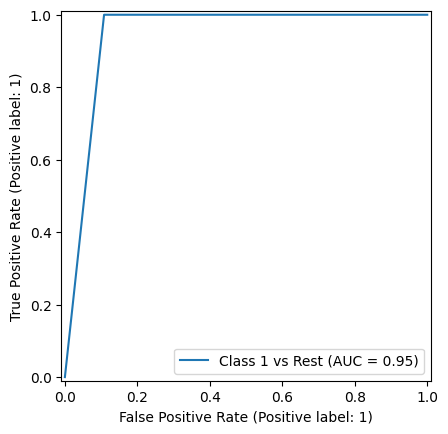

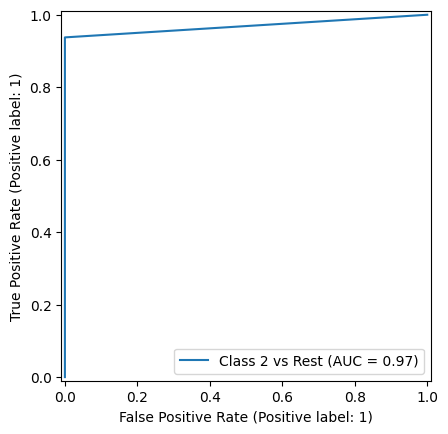

In [69]:
y_prob = best_model.predict_proba(x_test)

roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class='ovr')
print(roc_auc_ovr)

y_test_bin = label_binarize(y_test, classes = best_model.classes_)
n_classes = y_test_bin.shape[1]

for i in range(n_classes):
    RocCurveDisplay.from_predictions(
        y_test_bin[:,i],
        y_prob[:,i],
        name=f"Class {i} vs Rest",
        plot_chance_level =(i==0)
    )

plt.show()

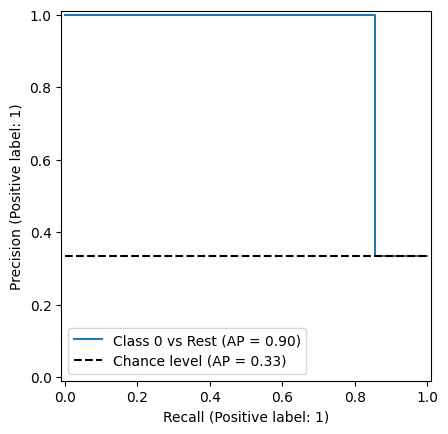

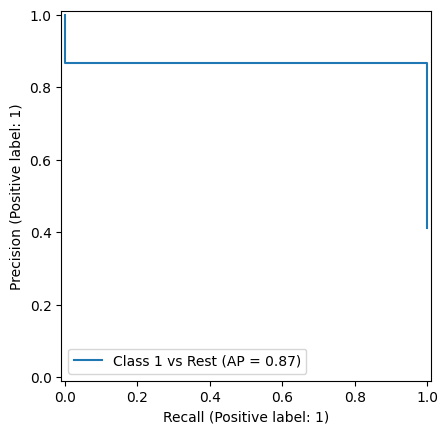

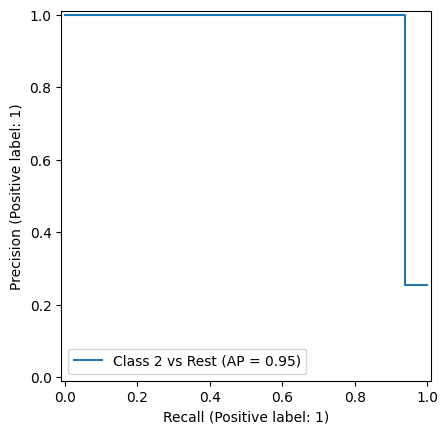

In [71]:
precision = dict()
recall = dict()
pr_auc = dict()

for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:,i], y_prob[:,i])
    pr_auc[i] = auc(recall[i], precision[i])
    PrecisionRecallDisplay.from_predictions(
        y_test_bin[:,i],
        y_prob[:,i],
        name=f"Class {i} vs Rest",
        plot_chance_level =(i==0)
    )

plt.show()

In [18]:
ada = best_model.named_steps['ada']
feature_importances = pd.DataFrame({
    'Feature': x.columns,
    'Importance': ada.feature_importances_
}).sort_values(by='Importance', ascending =False)

print(feature_importances)

                 Feature  Importance
6             Flavanoids    0.425228
9        Color_Intensity    0.413103
12               Proline    0.113410
2                    Ash    0.025681
1             Malic_Acid    0.022577
0                Alcohol    0.000000
3           Ash_Alcanity    0.000000
4              Magnesium    0.000000
5          Total_Phenols    0.000000
7   Nonflavanoid_Phenols    0.000000
8        Proanthocyanins    0.000000
10                   Hue    0.000000
11                 OD280    0.000000


C:\Users\Robyi\AppData\Local\Temp\ipykernel_7196\3486866868.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances['Importance'], y=feature_importances['Feature'], orient="h", palette="viridis")


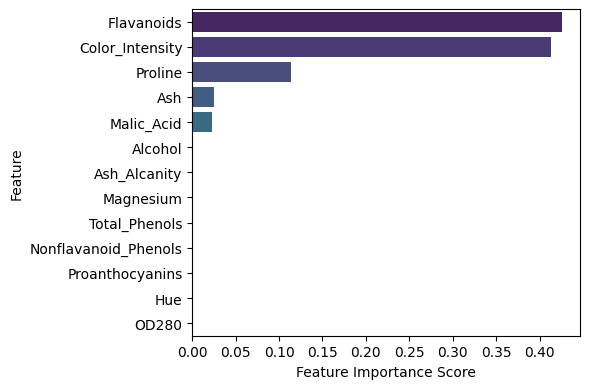

In [19]:
plt.figure(figsize=(6, 4))
sns.barplot(x=feature_importances['Importance'], y=feature_importances['Feature'], orient="h", palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.tight_layout()

In [21]:
explainer = shap.Explainer(best_model.predict, x_train)
shap_values = explainer(x_test)

PermutationExplainer explainer: 64it [00:19,  3.31it/s]                        


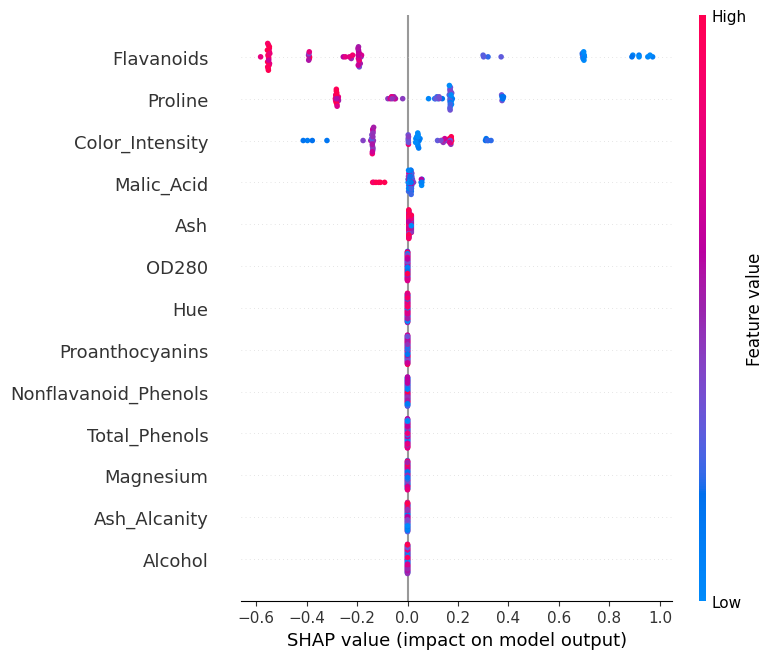

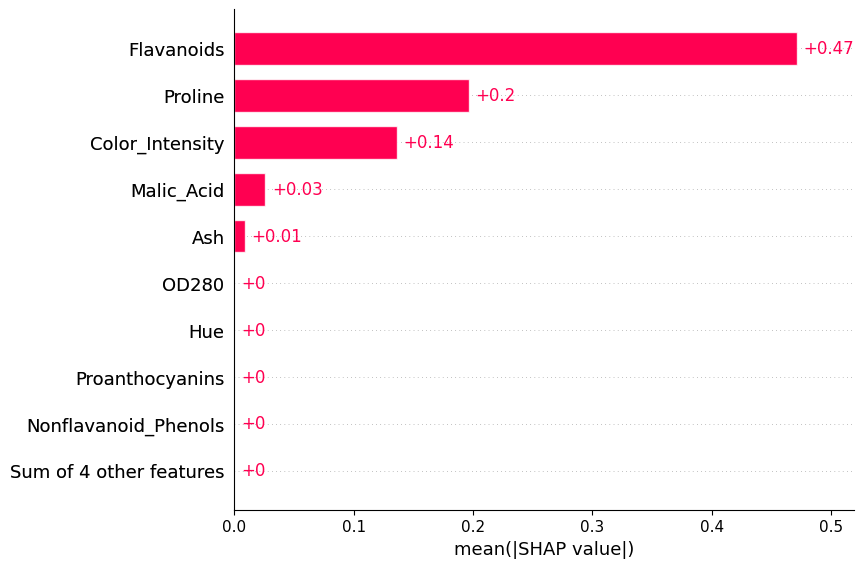

In [22]:
shap.summary_plot(shap_values, x_test, feature_names=x.columns)
shap.plots.bar(shap_values)